# Summary of Notebook
    Created a target shopper profile
            target shopper = married

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt

In [2]:
#import pickle active customers dataframe
df_active = pd.read_pickle(r'C:\Users\Selena\Desktop\3-22 Instacart Basket Analysis\04 Analysis\active_all_plus_regions_order_paid.pkl')
path = r'C:\Users\Selena\Desktop\3-22 Instacart Basket Analysis'
df_active = pd.read_pickle(os.path.join(path, '04 Analysis', 'active_all_plus_regions_order_paid.pkl'))

In [3]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28669841 entries, 0 to 30330083
Data columns (total 31 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int16         
 3   day_of_week_ordered     int16         
 4   hour_of_day_ordered     int16         
 5   days_since_prior_order  float64       
 6   product_id              int32         
 7   add_to_cart_order       int16         
 8   reordered               int16         
 9   product_name            category      
 10  aisle_id                int16         
 11  department_id           int16         
 12  price                   float64       
 13  gender                  category      
 14  state                   category      
 15  age                     int16         
 16  date_joined             datetime64[ns]
 17  dependents              int16         
 18  

In [4]:
#defining value flag
df_active.loc[df_active['living_situation'] == 'married', 'value_flag'] = 'target shopper'

In [5]:
#defining value flag
df_active.loc[df_active['living_situation'] == 'divorced/widowed', 'value_flag'] = 'not target'

In [6]:
#defining value flag
df_active.loc[df_active['living_situation'] == 'living with parents and siblings', 'value_flag'] = 'not target'

In [7]:
#defining value flag
df_active.loc[df_active['living_situation'] == 'single', 'value_flag'] = 'not target'

In [8]:
df_active.head()

,order_id,user_id,order_number,day_of_week_ordered,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_period_of_day,max_order,loyalty_flag,total_spent,spender_flag,median_days_prior_ord,frequency_flag,region,order_paid_amount,value_flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Average Orders,10,New customer,344.1,Low spender,20.5,Regular customer,South,35.4,target shopper
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Most Orders,10,New customer,344.1,Low spender,20.5,Regular customer,South,28.2,target shopper
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Average Orders,10,New customer,344.1,Low spender,20.5,Regular customer,South,26.0,target shopper
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Most Orders,10,New customer,344.1,Low spender,20.5,Regular customer,South,57.0,target shopper
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Average Orders,10,New customer,344.1,Low spender,20.5,Regular customer,South,25.0,target shopper


In [9]:
#seeing the number of customers in each category
df_active['value_flag'].value_counts(dropna=False)

target shopper    20132071
not target         8537770
Name: value_flag, dtype: int64

    #target shopper = married

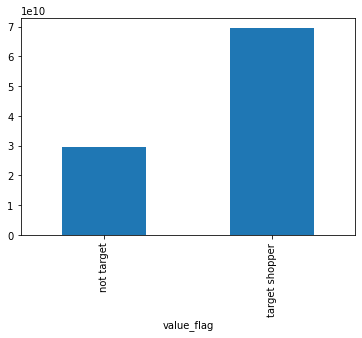

In [10]:
#seeing the difference in spending by value flag
figure1 = df_active.groupby('value_flag')['total_spent'].sum().plot.bar()

In [11]:
df_active.groupby('value_flag')['total_spent'].sum()

value_flag
not target        2.970266e+10
target shopper    6.955852e+10
Name: total_spent, dtype: float64

#there is an 134% increase in spending comparing a not target shopper to a target shopper

In [12]:
%matplotlib inline
#saving the image within desktop folder - added visualizations
figure1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_target_shopper_spending.jpg'),bbox_inches='tight')

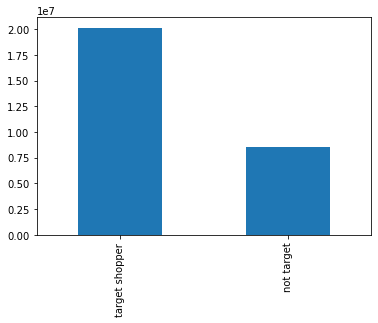

In [13]:
#seeing histogram of value customer
figure2 = df_active['value_flag'].value_counts(dropna=False).plot.bar()

In [14]:
#saving the image within desktop folder - added visualizations
figure2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_target_shopper_count.jpg'),bbox_inches='tight')

In [17]:
#exporting the new dataframe as a pickle
df_active.to_pickle(os.path.join(path, '04 Analysis','all_active_with_value.pkl'))